In [56]:
%pylab 
from nugridpy import mesa as ms
import os

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [57]:
ms.set_nugrid_path('/data/nugrid_apod2')

In [34]:
# NuGrid Set1 model:
nsa=ms.star_log(mass=2,Z=0.0001)

nugrid_path = /data/nugrid_apod2
closest set is set1.5a (Z = 0.0001)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


In [35]:
nsa.header_attr

{'burn_min1': 50.0,
 'burn_min2': 1000.0,
 'c12_boundary_limit': 0.0001,
 'h1_boundary_limit': 0.0001,
 'he4_boundary_limit': 0.0001,
 'initial_mass': 2.0,
 'initial_z': 0.0001}

In [36]:
nsa.get('surface_o16')[0]+nsa.get('surface_c12')[0]

8.6593436566000001e-05

In [37]:
s=sints[1]

In [38]:
s.get('surface_o16')[0]+s.get('surface_c12')[0]

0.0076291577573516772

<IPython.core.display.Javascript object>


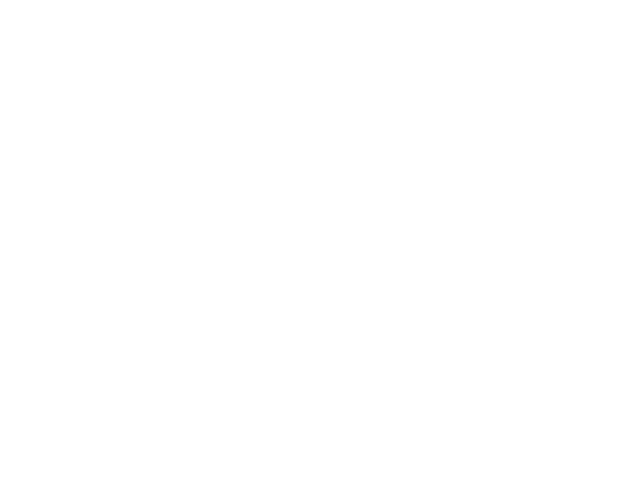

In [39]:
figure(101)
nsa.plot('model_number','log_LH',shape=shapes[mod(i,4)],\
           legend='Z='+str(nsa.header_attr['initial_z'])); i+=1

<IPython.core.display.Javascript object>


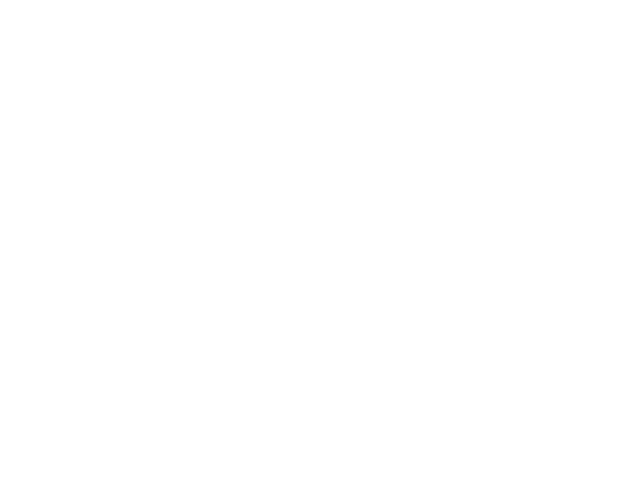

In [40]:
nsa.kippenhahn(102,'model')

In [58]:
from nugridpy import utils as ut

In [59]:
data_dir='/data/nugrid_apod2/scratch/MESA/Set_M2Zrange/'

In [60]:
!ls $data_dir

M2.00Z0.e-0  README.Set_template    plot_radius.py~    run_ssh.sh~
M2.00Z1.e-2  do_in_all_rundirs.sh   print_log_time.sh  vis2.py
M2.00Z1.e-3  do_in_all_rundirs.sh~  prof.py	       vis3.py
M2.00Z1.e-4  findCOgt1p15.py	    prof.py~	       vis3.py~
M2.00Z1.e-5  ipython_log.py	    rhoc-Tc.py	       vis_runs.py
M2.00Z1.e-6  kill_all.sh	    run.list	       work_template
M2.00Z1.e-7  mkidx.sh		    run.list.all
M2.00Z1.e-8  out.png		    run.list~
M2.00Z2.e-2  plot_radius.py	    run_ssh.sh


In [61]:
cases = [ case for case in os.listdir(data_dir) if  'M2.00' in case]
cases.sort()
cases[0], cases[-1] = cases[-1], cases[0] 
print(cases)

['M2.00Z2.e-2', 'M2.00Z1.e-2', 'M2.00Z1.e-3', 'M2.00Z1.e-4', 'M2.00Z1.e-5', 'M2.00Z1.e-6', 'M2.00Z1.e-7', 'M2.00Z1.e-8', 'M2.00Z0.e-0']


In [62]:
%%capture
sints=[]
for case in cases:
    sints.append(ms.star_log(os.path.join(data_dir,case,'LOGS')))


In [63]:
ZZ=[]
for s in sints:
    ZZ.append(s.header_attr['initial_z'])
print(ZZ  )  

[0.02, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 0.0]


<IPython.core.display.Javascript object>


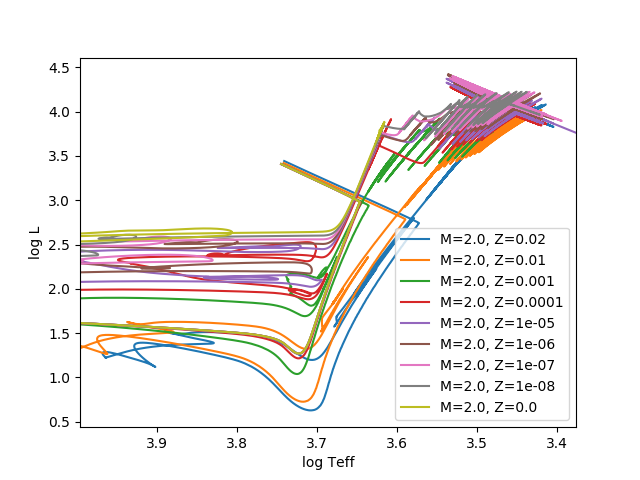

In [64]:
figure(1)
for s in sints:
    s.hrd_new()

<IPython.core.display.Javascript object>


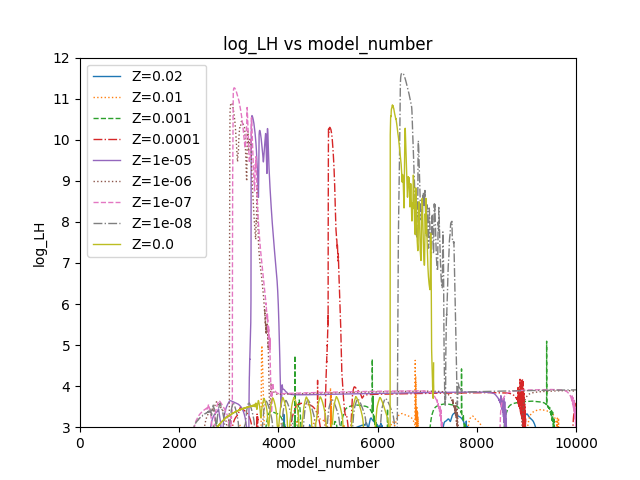

In [65]:
figure(2)
shapes=['-',':','--','-.']; i=0
for s in sints:
    s.plot('model_number','log_LH',shape=shapes[mod(i,4)],\
           legend='Z='+str(s.header_attr['initial_z'])); i+=1
    ylim(3,12); xlim(0,10000)

In [66]:
s.get('h1_boundary_mass')[-1]

0.66470864254115014

In [67]:
mhfree = []
for s in sints:
    mhfree.append(s.get('h1_boundary_mass')[-1])

In [68]:
mhfree

[0.61192592225791298,
 0.58814950288822265,
 0.57882809114290656,
 0.62697949181837875,
 0.63573186924937164,
 0.66042181784460163,
 0.67270867808645951,
 0.67629498240165953,
 0.66470864254115014]

## Core masses at end of calculation as a function of initial Z

<IPython.core.display.Javascript object>


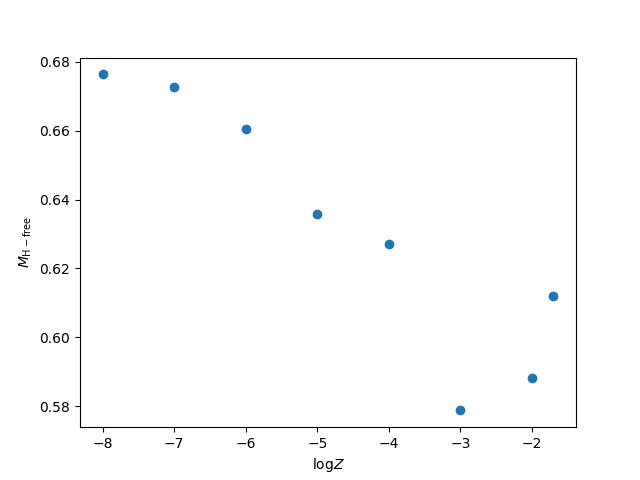

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [70]:
figure(121)
plot(log10(array(ZZ)),mhfree,'o')
xlabel('$ \log Z$'); ylabel('$M_\mathrm{H-free}$')

## Z=0.0001
This model shows a real and pronounced HIF, although the NuGrid Set1 models (Ritter+ 16) do not show that, and my 2004 models also do not show this. 

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map


<IPython.core.display.Javascript object>


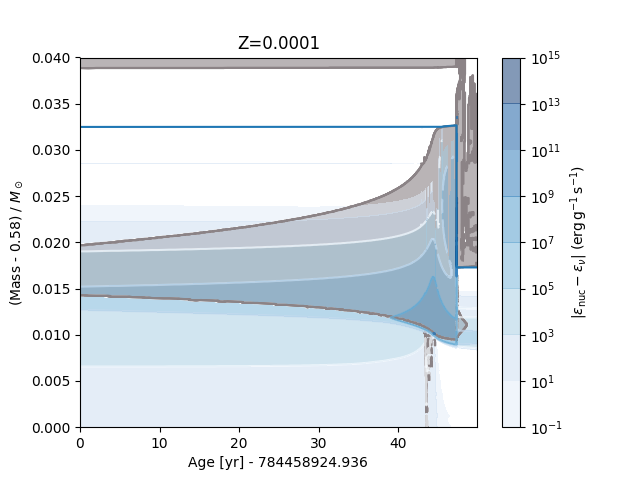

plot versus age
plotting contours


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [72]:
modstart=4600; s=sints[3]
s.kip_cont(ifig=15, modstart=modstart, modstop=5300, \
            t0_model=modstart, ixaxis='age', xres=2000, yres=2000, ylims=[0.58,0.62])
title('Z='+str(s.header_attr['initial_z']))

<IPython.core.display.Javascript object>


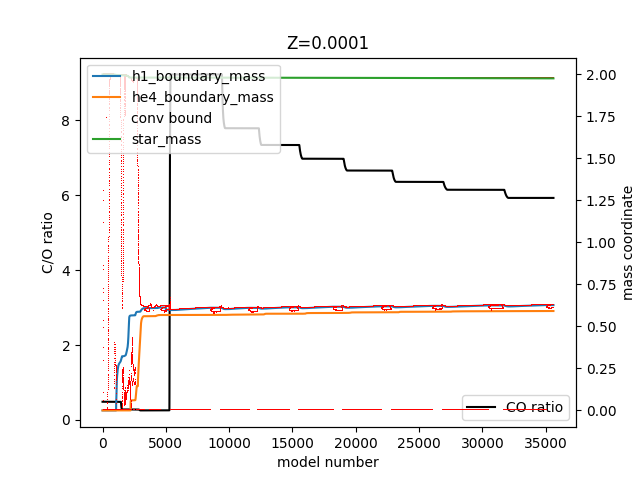

<IPython.core.display.Javascript object>


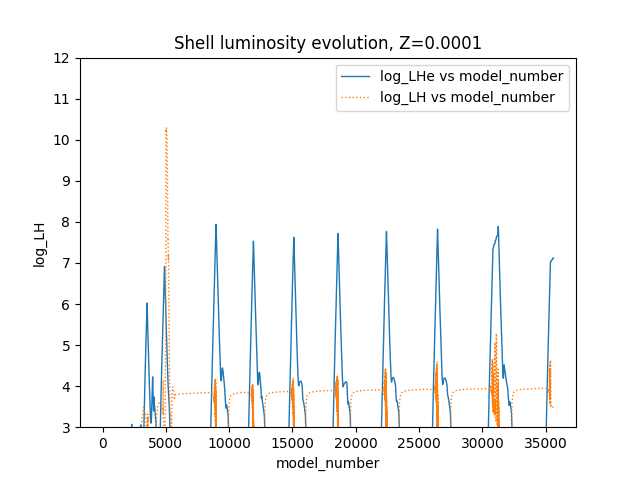

<IPython.core.display.Javascript object>


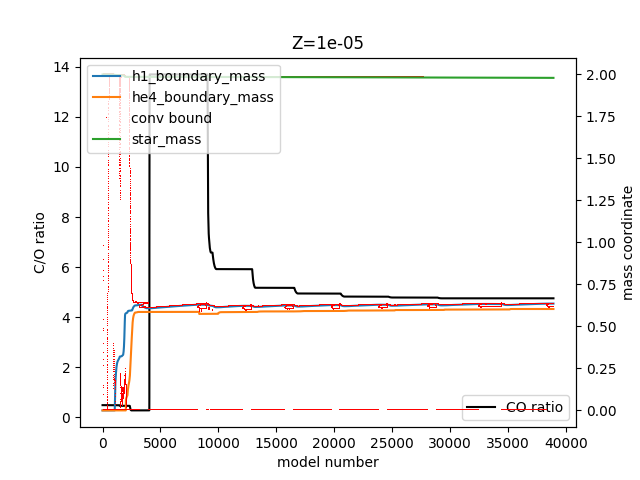

<IPython.core.display.Javascript object>


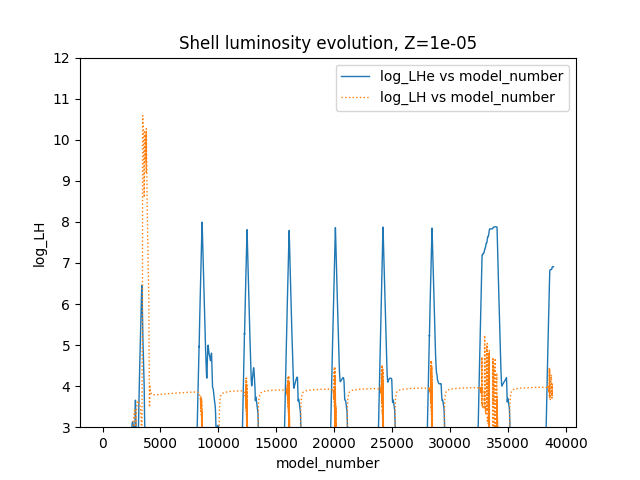

<IPython.core.display.Javascript object>


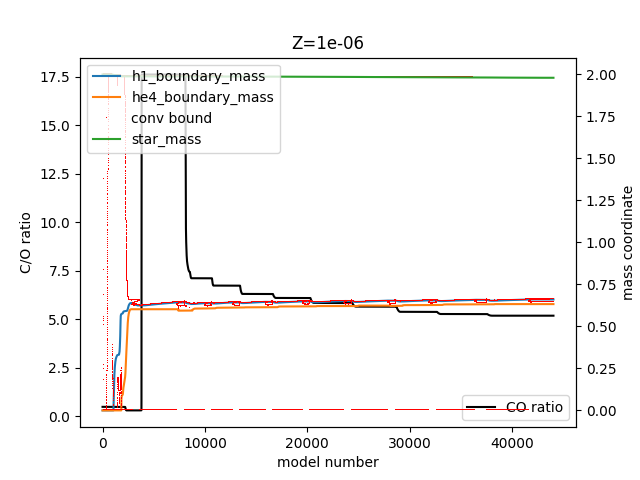

<IPython.core.display.Javascript object>


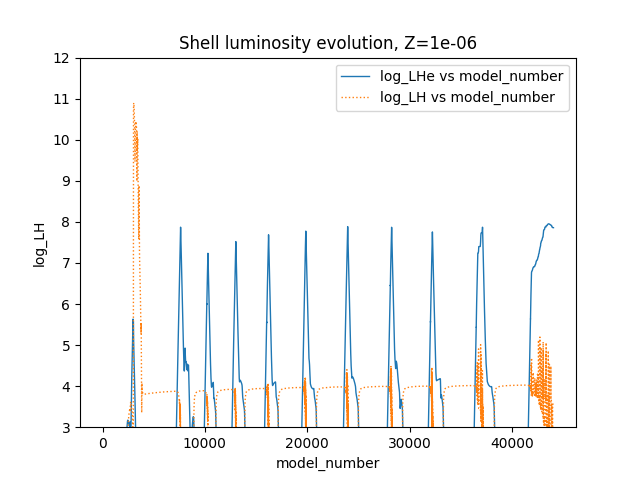

<IPython.core.display.Javascript object>


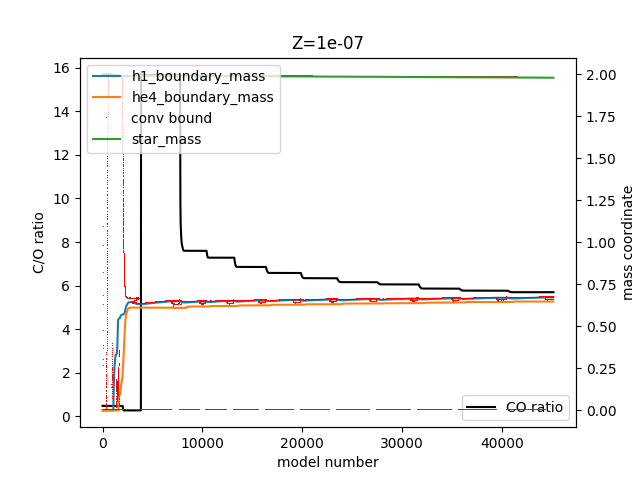

<IPython.core.display.Javascript object>


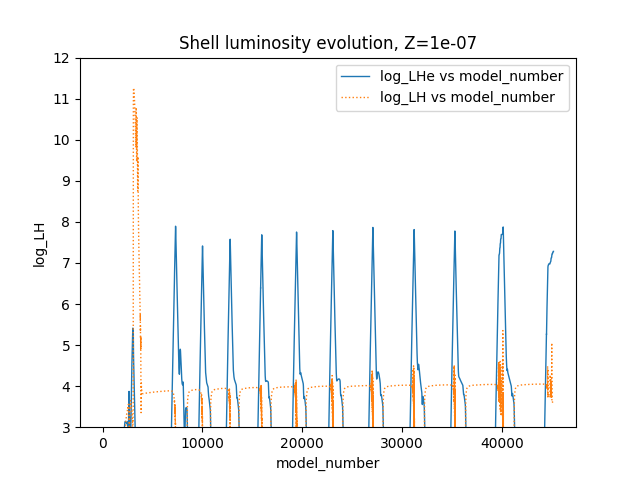

<IPython.core.display.Javascript object>


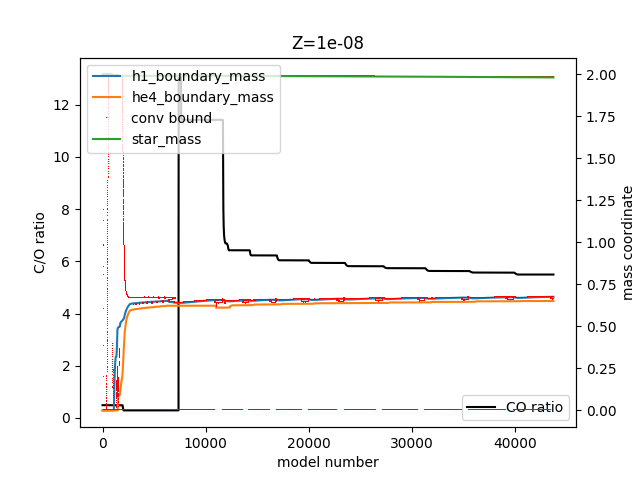

<IPython.core.display.Javascript object>


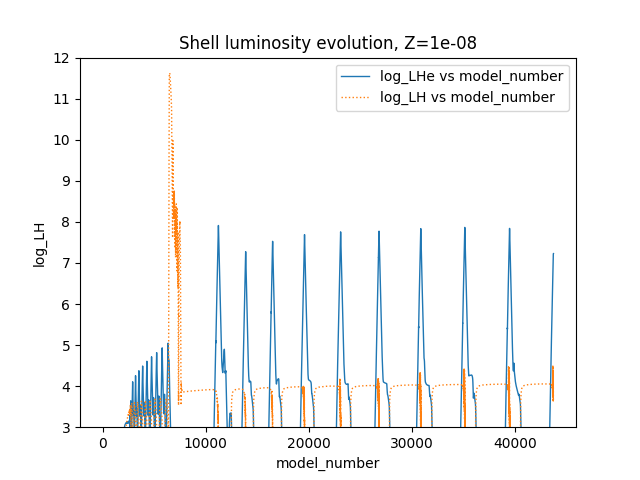

<IPython.core.display.Javascript object>


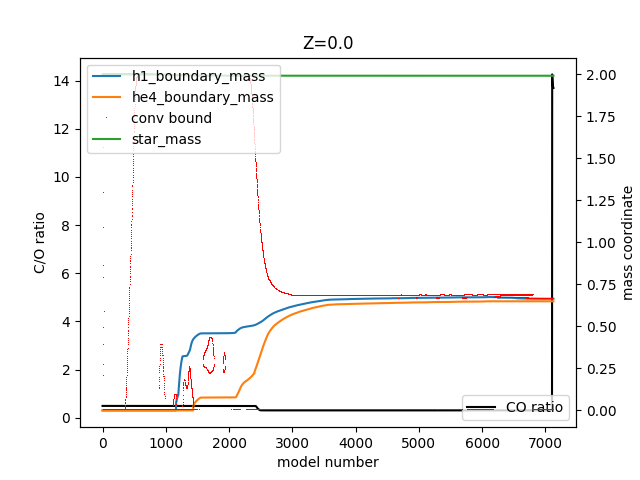

<IPython.core.display.Javascript object>


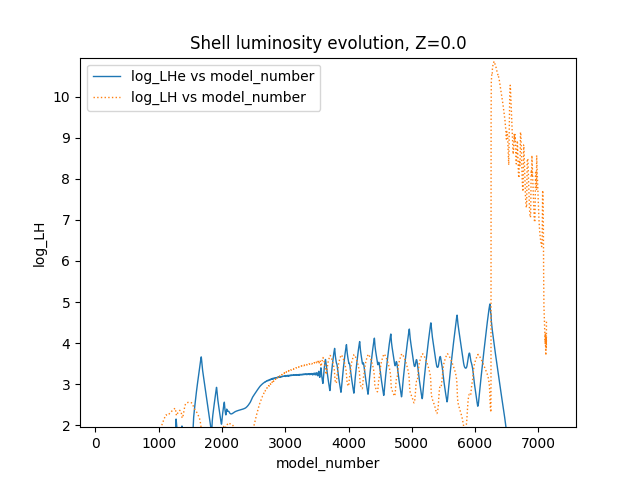

In [73]:
shapes=['-',':','--','-.']; i=5
for s in sints[3:]:
    close(i);figure(i)
    s.kippenhahn_CO(i,'model'); i+=1
    title('Z='+str(s.header_attr['initial_z']))
    close(i);figure(i)
    s.plot('model_number','log_LHe',shape=shapes[mod(i,3)]); i+=1
    s.plot('model_number','log_LH',shape=shapes[mod(i,3)]); i+=1
    ylim(3,12)
    title('Shell luminosity evolution, Z='+str(s.header_attr['initial_z']))

## Z=1e-5

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map


<IPython.core.display.Javascript object>


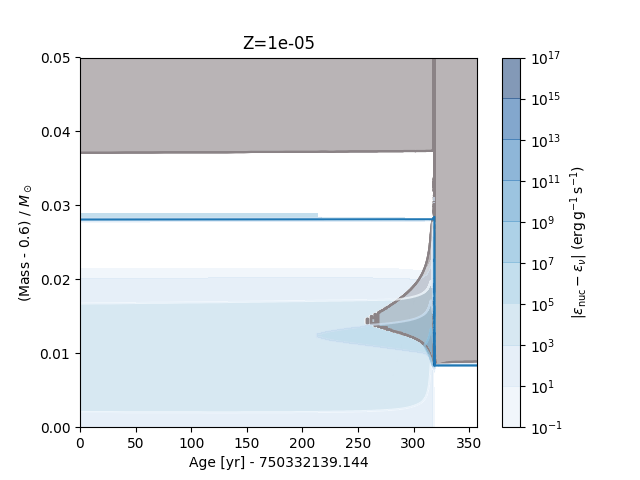

plot versus age
plotting contours


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [74]:
modstart=3090; modstop=4100; s=sints[4]; ifig=16; close(ifig)
s.kip_cont(ifig=ifig, modstart=modstart, modstop=modstop, \
            t0_model=modstart, ixaxis='age', xres=2000, yres=2000, ylims=[0.6,0.65])
title('Z='+str(s.header_attr['initial_z']))

## Evolution of C+O
The first PDCZ with HIF increases the C+O abundance in the envelope by 2 orders of magnitude, removing the conditions for the occurance of the HIF. For that reason the HIF will occur only once in a low-Z AGB evolution. 

<IPython.core.display.Javascript object>


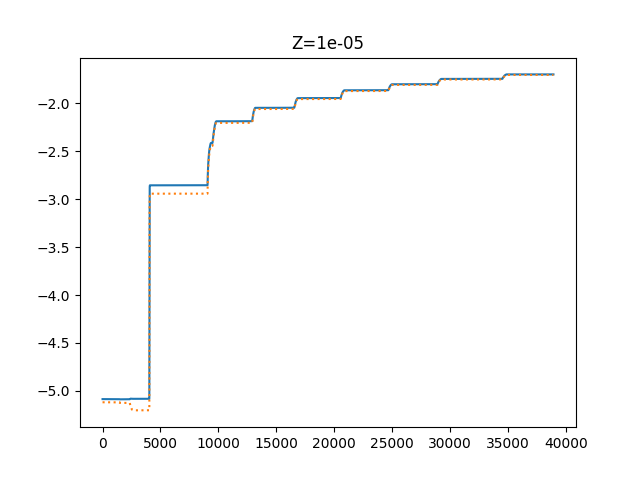

In [75]:
ifig=20; close(ifig); figure(ifig)
plot(s.get('model_number'),log10(s.get('surface_n14')+s.get('surface_c12')+s.get('surface_o16')),'-')
plot(s.get('model_number'),log10(s.get('surface_c12')+s.get('surface_o16')),':')
title('Z='+str(s.header_attr['initial_z']))

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map


<IPython.core.display.Javascript object>


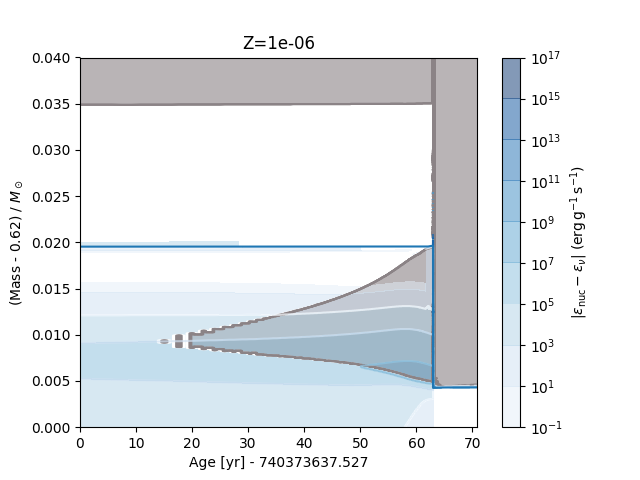

plot versus age
plotting contours


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [77]:
# Z = 1e-6
modstart=2820; modstop=3850; s=sints[5]; ifig=17; close(ifig)
s.kip_cont(ifig=ifig, modstart=modstart, modstop=modstop, \
            t0_model=modstart, ixaxis='age', xres=2000, yres=2000, ylims=[0.62,0.66])
title('Z='+str(s.header_attr['initial_z']))

## redoing the first pulse with HIF
Using smaller time steps to better resolve the HIF and PDCZ. Case 2 is just with more output, whicle case 3 is with smaller time steps. 

In [78]:
%%capture
s5s=[]; case='M2.00Z1.e-5'
for i in range(3):
    s5s.append(ms.star_log(os.path.join(data_dir,case,'LOGS'+str(i+1))))

<IPython.core.display.Javascript object>


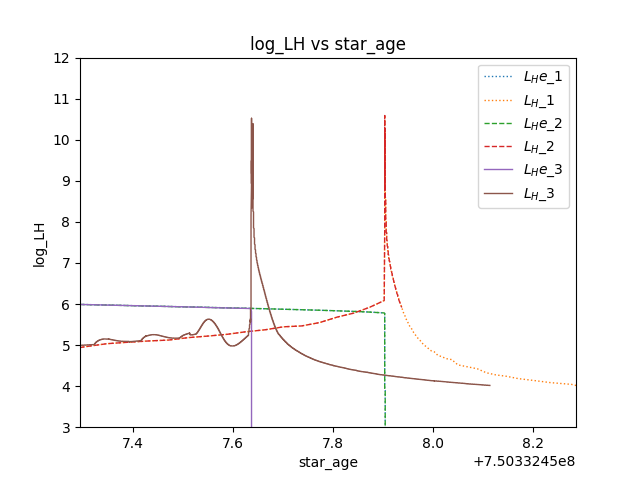

(750332457.2944217, 750332458.2850542)

In [82]:
figure(30)
shapes=['-',':','--']; i=1
for s in s5s:
    s.plot('star_age','log_LHe',shape=shapes[mod(i+3,3)], legend='$L_He$_'+str(i))
    s.plot('star_age','log_LH',shape=shapes[mod(i,3)],\
           legend='$L_H$_'+str(i)); i+=1
ylim(3,12); xlim(750332457.29442167, 750332458.28505421)



In [81]:
ylim()

(2.136310245169617, 11.672450030831749)